# Model Evaluation
You need to use cross validation to evaluate the performance of three different decision tree models



In [67]:
# load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# load data
df = pd.read_csv('customer-churn-simple.csv')
df.info()
display(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   customer service calls  3333 non-null   int64  
 6   churn                   3333 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 159.6+ KB


,state,account length,international plan,total day minutes,total day calls,customer service calls,churn
0,KS,128,no,265.1,110,1,False
1,OH,107,no,161.6,123,1,False
2,NJ,137,no,243.4,114,0,False
3,OH,84,yes,299.4,71,2,False
4,OK,75,yes,166.7,113,3,False


In [69]:
# calculate the base line accuracy if predict all customers loyal
# Its below


## Data Preparation

In [70]:
# we only choose three numerical features with no data issues to train the model
# account length, total day minutes, customer service calls
X = df[['account length', 'total day minutes', 'customer service calls']]
y = df['churn']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   total day minutes       3333 non-null   float64
 2   customer service calls  3333 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 78.2 KB


In [87]:
# Split the data into a training set and a test set. 
# You need to use 30% of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

print(X_train.shape)
print(X_test.shape)


(2333, 3)
(1000, 3)


# Baseline Score Here

In [112]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [117]:

false_arr=np.zeros((1000, 1), dtype=bool)
y_base_predict=pd.DataFrame({'churn': false_arr[:, 0], })
base_accuracy=accuracy_score(y_test,y_base_predict)
print(base_accuracy)
#I dont know for which I should do the baseline predict, so I did for both which made sense to me, but we never talked about baseline in class neither i find it in the example so i assume
false_arr=np.zeros((3333, 1), dtype=bool)
y_base_predict2=pd.DataFrame({'churn': false_arr[:, 0], })
base_accuracy=accuracy_score(y,y_base_predict2)
print(base_accuracy)

0.854
0.8550855085508551


## Model Evaluation

In [89]:
# let's build three decision trees with different model parameters
# tree 1: criterion='entropy', max_depth=3
# tree 2: criterion='entropy', max_depth=6
# tree 3: criterion='gini', max_depth=6

from sklearn.tree import DecisionTreeClassifier

tree_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tree_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=6)

In [90]:
# calculate accuracy, precision, recall using 10-fold cross validation
# print out the scores for eacch tree as follows
from sklearn.model_selection import cross_validate


In [91]:
score_params = {
    'accuracy' : make_scorer(accuracy_score), 
    'precision' : make_scorer(precision_score),
    'recall' : make_scorer(recall_score),
    }



def eval_model(model, train, test, score_params, fold):
    model_scores = cross_validate(model, train, test, scoring=score_params, cv=fold)
    a_mean = model_scores['test_accuracy'].mean() 
    p_mean = model_scores['test_precision'].mean() 
    r_mean = model_scores['test_recall'].mean() 
    return [a_mean, p_mean, r_mean]


tree1_scores = eval_model(tree_clf1, X_train, y_train, score_params, 10)
tree2_scores = eval_model(tree_clf2, X_train, y_train, score_params, 10)
tree3_scores = eval_model(tree_clf3, X_train, y_train, score_params, 10)


print("Average Accuracy Scores for each model:")
print(f'Tree 1 Average Accuracy Scores: {tree1_scores[0]}')
print(f'Tree 2 Average Accuracy Scores: {tree2_scores[0]}')
print(f'Tree 3 Average Accuracy Scores: {tree3_scores[0]}')

print("Average Percision Scores for each model:")
print(f'Tree 1 Average Percision Scores: {tree1_scores[1]}')
print(f'Tree 2 Average Percision Scores: {tree2_scores[1]}')
print(f'Tree 3 Average Percision Scores: {tree3_scores[1]}')


print("Average Recall Scores for each model:")
print(f'Tree 1 Average Recall Scores: {tree1_scores[2]}')
print(f'Tree 2 Average Recall Scores: {tree2_scores[2]}')
print(f'Tree 3 Average Recall Scores: {tree3_scores[2]}')

Average Accuracy Scores for each model:
Tree 1 Average Accuracy Scores: 0.883399361725542
Tree 2 Average Accuracy Scores: 0.8765434136678772
Tree 3 Average Accuracy Scores: 0.8799787241847328
Average Percision Scores for each model:
Tree 1 Average Percision Scores: 0.6972234490655543
Tree 2 Average Percision Scores: 0.6162233538100075
Tree 3 Average Percision Scores: 0.6453937404334497
Average Recall Scores for each model:
Tree 1 Average Recall Scores: 0.35008912655971475
Tree 2 Average Recall Scores: 0.36122994652406415
Tree 3 Average Recall Scores: 0.36140819964349374


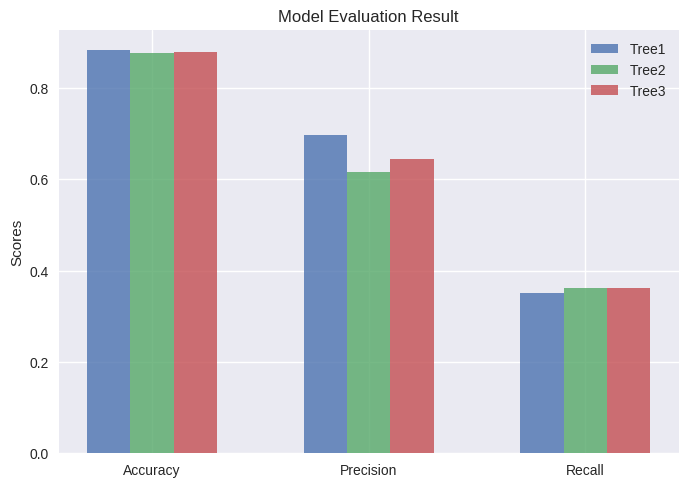

In [121]:
# Visualize via a grouped bar chart as shown below
# https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

plt.style.use('seaborn')
labels = ['Accuracy', 'Precision', 'Recall']
label_loc = np.arange(len(labels)) 
bar_width = 0.2  

fig, ax = plt.subplots()
rects1 = ax.bar(label_loc - bar_width, tree1_scores, bar_width, label='Tree1', alpha=0.8)
rects2 = ax.bar(label_loc, tree2_scores, bar_width, label='Tree2', alpha=0.8)
rects3 = ax.bar(label_loc + bar_width, tree3_scores, bar_width, label='Tree3', alpha=0.8)

ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Result')
ax.set_xticks(label_loc)
ax.set_xticklabels(labels)
ax.legend()


## Final Model and Prediction

In [93]:
# choose the best model

# retrain the final model using ALL training data
tree_clf1.fit(X_train, y_train)



# get the prediction results from the testing set
y_pred = tree_clf1.predict(X_test)

# calculate accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print(f'Precision Score : {precision_score(y_test,y_pred)}')
print(f'Recall Score : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')

# Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good


Accuracy Score : 0.889
Precision Score : 0.7868852459016393
Recall Score : 0.3287671232876712
F1 Score : 0.463768115942029


Confusion Matrix: 
 [[ 48  98]
 [ 13 841]]


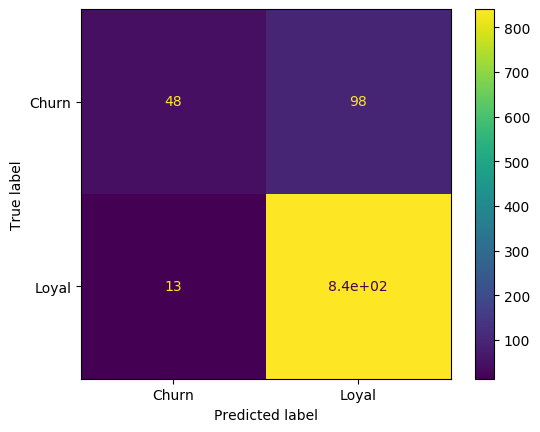

In [98]:
# plot the confusion matrix as show below
# you have to use the display labels with correct locations
plt.style.use('default') # use default styple for confusion matrix plots

from sklearn.metrics import plot_confusion_matrix
class_names=["Churn", "Loyal"]
disp = plot_confusion_matrix(tree_clf1, X_test, y_test, labels=[1,0],display_labels=class_names)

# disp.confusion_matrix returns confusion matrix as an array
print(f'Confusion Matrix: \n {disp.confusion_matrix}' )

In [105]:
# manually calculate the precision based on the confusion matrix above and check with the generated score
print(f"Manual precision score: {disp.confusion_matrix[0][0]/(disp.confusion_matrix[0][0]+disp.confusion_matrix[1][0])}")
print(f'Automa Precision Score : {precision_score(y_test,y_pred)}')

Manual precision score: 0.7868852459016393
Automa Precision Score : 0.7868852459016393
